## Trabalho Final de Classificação: SVD da Disciplina de Algebra Linear

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import glob
import numba
from sklearn.model_selection import train_test_split as division

### Redimensionando o tamanho das imagens de 400x400 para 40x40

In [2]:
images = glob.glob('*/*/*.png')

for file in images:
    img = Image.open(file)
    width, height = img.size
    (new_width, new_height) = (40, 40)
    img = img.resize(
        (round(new_width),
        round(new_height)),
        Image.ANTIALIAS)
    img.save(file, format='png')

### Convertendo as imagens de RGB para níveis de cinza (monocromáticas)

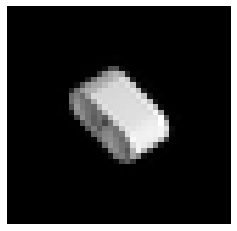

tamanho da dimensão da imagem retirando o RGB: (40, 40)


In [3]:
for file in images:
    img = Image.open(file).convert('L')
    img.save(file, format='png')

images_array = np.asarray(glob.glob('*/*/*.png'))
teste = Image.open(images_array[0])
teste = np.asarray(teste, dtype=np.float32)/255

plt.figure(figsize=(4, 4))
im = plt.imshow(teste, aspect='auto', cmap='gray')
plt.axis("off")
plt.show()
print("tamanho da dimensão da imagem retirando o RGB:", teste.shape)

### Dividindo as imagens em treino e teste (80% treino e 20% teste) e compondo nossa matriz de dados de treino com os dados das imagens de treino

dimensão da matriz de dados de treino: (32000, 1600)


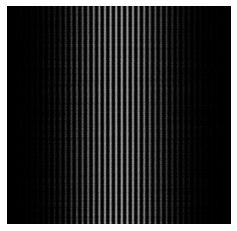

In [4]:
images_array = np.asarray(glob.glob('*/*/*.png'))
images_train, images_test = division(images_array, test_size=0.2, random_state=5)
data_matrix = Image.open(images_train[0])
data_matrix = np.asarray(data_matrix, dtype=np.float32)/255
data_matrix = np.reshape(data_matrix, (1, 1600))

for i in range(1, images_train.shape[0]):
        aux = Image.open(images_train[i])
        aux = np.asarray(aux, dtype=np.float32)/255
        aux = np.reshape(aux, (1, 1600))
        data_matrix = np.vstack((data_matrix, aux))

print("dimensão da matriz de dados de treino:", data_matrix.shape)
plt.figure(figsize=(4, 4))
im = plt.imshow(data_matrix, aspect='auto', cmap='gray')
plt.axis("off")
plt.show()

### Centralizando a matriz de dados original X^ obtendo a matriz X.

In [5]:
centralized_data_matrix = data_matrix - np.mean(data_matrix, axis=0)
print(centralized_data_matrix.shape)

(32000, 1600)


### Calculando a decomposição espectral da matriz de covariância dos dados, isto é, cov(X) = QΛQT, usando a função do NumPy:
### np.linalg.eigh(cov(X)).

In [6]:
cov_centralized_data_matrix = np.cov(centralized_data_matrix, rowvar=0)

w, q = np.linalg.eigh(cov_centralized_data_matrix)

print(w)
print(q)

[-6.05157458e-17 -5.05469670e-17 -2.74215885e-17 ...  1.75704463e+00
  2.00499990e+00  5.86672005e+00]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


### Ordenando os autovalores e autovetores correspondentes em ordem decrescente

In [7]:
index = np.argsort(w)[::-1]

w_dec = w[index]
q_dec = q[index]

print(w_dec)
print(q_dec)

[ 5.86672005e+00  2.00499990e+00  1.75704463e+00 ... -2.74215885e-17
 -5.05469670e-17 -6.05157458e-17]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


### Tarefas

### Calcular, para o respectivo banco de dados, a SVD da matriz de dados centralizados X. Gerar um gráco de número de valores singulares versus variabilidade acumulada.

In [8]:
u, s, vt = np.linalg.svd(centralized_data_matrix, full_matrices=False)
print(u.shape)
print(s.shape)
print(vt.shape)

(32000, 1600)
(1600,)
(1600, 1600)


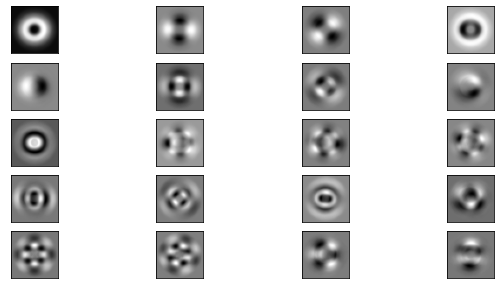

In [29]:
fig = plt.figure(figsize=(10,5))
for i in range(20):
    sub = fig.add_subplot(5, 4,i+1)
    sub.imshow(np.reshape(vt.T[:,i], (40,40)), cmap='gray')
    sub.set_xticks([])
    sub.set_yticks([])
    sub.set_xticklabels([])
    sub.set_yticklabels([])

In [10]:
singular_vectors = np.array([0])
accumulated_variability = np.array([0])

for i in range(0, s.shape[0]-1, 10):
    aux = 100*((np.sum(s[0:i]**2))/(np.sum(s**2)))
    accumulated_variability = np.hstack((accumulated_variability, aux))

    singular_vectors = np.hstack((singular_vectors, i))

    print(f'Vetores singulares: {i}, Variabilidade acumulada: {aux}%')

Vetores singulares: 0, Variabilidade acumulada: 0.0%
Vetores singulares: 10, Variabilidade acumulada: 65.03342986106873%
Vetores singulares: 20, Variabilidade acumulada: 74.90720748901367%
Vetores singulares: 30, Variabilidade acumulada: 79.98246550559998%
Vetores singulares: 40, Variabilidade acumulada: 83.181232213974%
Vetores singulares: 50, Variabilidade acumulada: 85.43968796730042%
Vetores singulares: 60, Variabilidade acumulada: 87.2837245464325%
Vetores singulares: 70, Variabilidade acumulada: 88.66776823997498%
Vetores singulares: 80, Variabilidade acumulada: 89.77519869804382%
Vetores singulares: 90, Variabilidade acumulada: 90.68010449409485%
Vetores singulares: 100, Variabilidade acumulada: 91.44431352615356%
Vetores singulares: 110, Variabilidade acumulada: 92.10508465766907%
Vetores singulares: 120, Variabilidade acumulada: 92.68648624420166%
Vetores singulares: 130, Variabilidade acumulada: 93.20039749145508%
Vetores singulares: 140, Variabilidade acumulada: 93.667459487

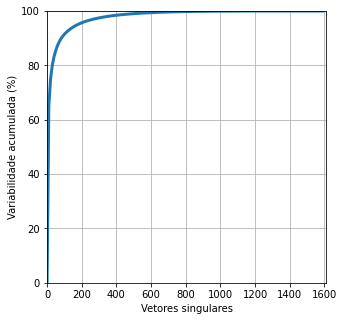

In [11]:
plt.figure(figsize=(5,5))
plt.plot(singular_vectors, accumulated_variability, lw=3.0)
plt.grid()
plt.ylabel("Variabilidade acumulada (%)")
plt.xlabel("Vetores singulares")
plt.axis([0, s.shape[0] + 10, 0, 100])
plt.show()

In [25]:
r = 40
img_proj = vt.T[:,0:r]
projected_train_images = centralized_data_matrix@img_proj
projected_train_images.shape

(32000, 40)

dimensão da matriz de dados de treino: (8000, 1600)


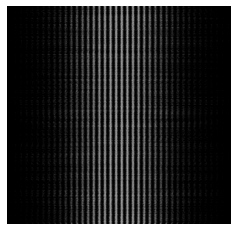

In [13]:
test_data_matrix = Image.open(images_train[0])
test_data_matrix = np.asarray(test_data_matrix, dtype=np.float32)/255
test_data_matrix = np.reshape(test_data_matrix, (1, 1600))

for i in range(1, images_test.shape[0]):
        aux = Image.open(images_test[i])
        aux = np.asarray(aux, dtype=np.float32)/255
        aux = np.reshape(aux, (1, 1600))
        test_data_matrix = np.vstack((test_data_matrix, aux))

print("dimensão da matriz de dados de treino:", test_data_matrix.shape)
plt.figure(figsize=(4, 4))
im = plt.imshow(test_data_matrix, aspect='auto', cmap='gray')
plt.axis("off")
plt.show()

In [26]:
r = 40
img_proj_test = vt.T[:,0:r]
projected_test_images = test_data_matrix@img_proj_test
projected_test_images.shape

(8000, 40)

In [46]:
#passa por todas as imagens de teste e ve o resultado encontrado
hits = 0
mistakes = 0
index= -1

@numba.jit(fastmath=True, cache=True, nopython=False)
def find_match(images_test, images_train, hits, mistakes):
    hits = 0
    mistakes = 0
    index= -1
    for i in range(1, images_test.shape[0]):
        test_image = np.reshape(np.asarray(Image.open(images_test[i]),dtype=np.float32)/255,(1, 1600))
        distancia = 50000000
        for j in range(1, images_train.shape[0]):
            dist = np.linalg.norm(projected_test_images[i,:]-projected_train_images[j,:])
            if dist <= distancia:
                index = j
                distancia = dist
        name = images_train[index]
        if images_test[i][-8:-4] == images_train[index][-8:-4]:
            hits+=1
        else:
            mistakes+=1
    total = hits+mistakes
    result = [hits, mistakes, total];
    return result;

In [47]:
a = find_match(images_test, images_train, hits, mistakes);
a

<ipython-input-46-98df2a32030a>:6: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "find_match" failed type inference due to: Unknown attribute 'open' of type Module(<module 'PIL.Image' from '/usr/lib/python3/dist-packages/PIL/Image.py'>)

File "<ipython-input-46-98df2a32030a>", line 12:
def find_match(images_test, images_train, hits, mistakes):
    <source elided>
    for i in range(1, images_test.shape[0], 10):
        test_image = np.reshape(np.asarray(Image.open(images_test[i]),dtype=np.float32)/255,(1, 1600))
        ^

During: typing of get attribute at <ipython-input-46-98df2a32030a> (12)

File "<ipython-input-46-98df2a32030a>", line 12:
def find_match(images_test, images_train, hits, mistakes):
    <source elided>
    for i in range(1, images_test.shape[0], 10):
        test_image = np.reshape(np.asarray(Image.open(images_test[i]),dtype=np.float32)/255,(1, 1600))
        ^

  @numba.jit(fastmath=True, cache=True, nopython=Fals

[1, 799, 800]

In [ ]:
    plt.figure(figsize=(5,5))
    plt.subplot(1,2,1)
    plt.imshow(np.reshape(test_image,(40,40)),cmap='gray')
    plt.title("Imagem teste")
    plt.axis("off")
    plt.subplot(1,2,2)
    name = images_train[index]
    plt.title("Imagem encontrada")
    plt.imshow(np.asarray(Image.open(name),dtype=np.float32)/255,cmap='gray')
    plt.axis("off")
    plt.show()

In [ ]:
#gera uma lista com todas as imagens de treino ja como combinação libear das r primeiras eigenfaces
r = 40 #quantidade de autovetores
projected_train_images = []
for i in range(100):
    name = images_train[i]
    imag = Image.open(images_train[i])
    imag = np.asarray(imag, dtype=np.float32)/255
    imag = np.reshape(imag, (1, 1600))
    imagProj = u[0:r,:]@imag.T
    imagProj = u[0:r,:].T@imagProj
    projected_train_images.append(imagProj)

In [ ]:
#passa por todas as imagens de teste e ve o resultado encontrado
acertos = 0
erros = 0
for individuo in images_test:
    test_image = Image.open(images_train[i])
    test_image = np.asarray(test_image, dtype=np.float32)/255
    test_image = np.reshape(test_image, (1, 1600))
    projected_test_image = u[0:r,:]@test_image.T
    projected_test_image = u[0:r,:].T@projected_test_image
    distancia = 500000
    index=-1
    for i in range(images_train.shape[0]): 
        dist = np.linalg.norm(projected_test_image-projected_train_images[i])
        if dist < distancia:
            distancia = dist
            index = i
    plt.figure(figsize=(5,5))
    plt.subplot(1,2,1)
    plt.imshow(np.reshape(test_image,(40,40)),cmap='gray')
    plt.title("Imagem teste")
    plt.axis("off")
    plt.subplot(1,2,2)
    name = images_train[index]
    plt.title("Imagem encontrada")
    plt.imshow(np.asarray(Image.open(name),dtype=np.float32)/255,cmap='gray')
    plt.axis("off")
    plt.show()
    if individuo[17:19] == images_train[index][17:19]:
        acertos+=1
    else:
        erros+=1
total = acertos+erros